In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stat
from tqdm import tqdm

In [12]:
def t_value(sample_size, confidence_level):
    return stat.t.ppf(1-(1-confidence_level)/2, sample_size)

In [55]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Define the Uniform density function
# def uniform_density(x, lower=-2.5, upper=2.5):
#     return np.where((x >= lower) & (x <= upper), 1 / (upper - lower), 0)

# # Define the Bimodal density function
# def bimodal_density(x):
#     return 0.5 * (np.exp(-0.5 * ((x - 2) / 0.8)**2) / (0.8 * np.sqrt(2 * np.pi))) + \
#            0.5 * (np.exp(-0.5 * ((x + 2) / 0.8)**2) / (0.8 * np.sqrt(2 * np.pi)))

# # Define the Skewed density function
# def skewed_density(x):
#     x = x - np.min(x) + 1  # Shift to avoid log issues
#     density = np.exp(-(np.log(x)**2) / 2) / (x * np.sqrt(2 * np.pi))
#     return density / np.max(density)  # Normalize

# # Define the x range
# x = np.linspace(-5, 5, 1000)

# # Calculate the density values
# uniform = uniform_density(x, lower=-2.5, upper=2.5)  # Uniform
# bimodal = bimodal_density(x)  # Bimodal
# skewed = skewed_density(x)  # Skewed

# # Plot the density functions
# plt.figure(figsize=(12, 6))

# plt.plot(x, uniform, label='Uniform', color='blue')
# plt.plot(x, bimodal, label='Bimodal', color='green')
# plt.plot(x, skewed, label='Skewed', color='red')

# plt.title('Example Density Functions')
# plt.xlabel('x')
# plt.ylabel('Density')
# plt.legend()
# plt.grid(True)
# plt.savefig('density_functions.png', dpi=300)
# plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

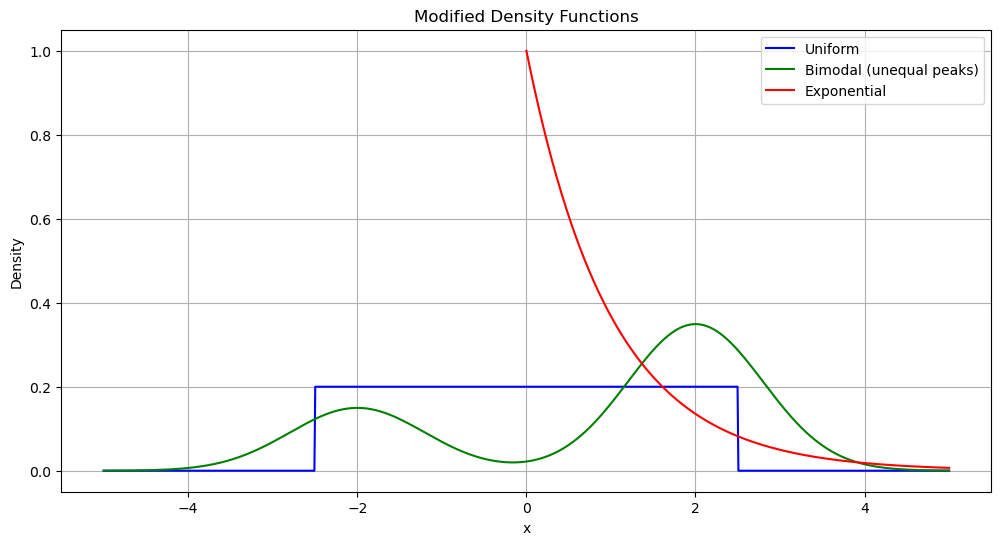

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Uniform density function
def uniform_density(x, lower=-2.5, upper=2.5):
    return np.where((x >= lower) & (x <= upper), 1 / (upper - lower), 0)

# Define the Modified Bimodal density function
def bimodal_density(x):
    peak1 = 0.7 * (np.exp(-0.5 * ((x - 2) / 0.8)**2) / (0.8 * np.sqrt(2 * np.pi)))
    peak2 = 0.3 * (np.exp(-0.5 * ((x + 2) / 0.8)**2) / (0.8 * np.sqrt(2 * np.pi)))
    return peak1 + peak2

# Define the Exponential density function
def exponential_density(x, rate=1):
    return rate * np.exp(-rate * x) * (x >= 0)

# Define the x range
x = np.linspace(-5, 5, 1000)

# Calculate the density values
uniform = uniform_density(x, lower=-2.5, upper=2.5)  # Uniform
bimodal = bimodal_density(x)  # Bimodal with unequal peaks
x_exp = np.linspace(0, 5, 1000)  # Exponential is defined for x >= 0
exponential = exponential_density(x_exp, rate=1)  # Exponential

# Plot the density functions
plt.figure(figsize=(12, 6))

plt.plot(x, uniform, label='Uniform', color='blue')
plt.plot(x, bimodal, label='Bimodal (unequal peaks)', color='green')
plt.plot(x_exp, exponential, label='Exponential', color='red')

plt.title('Modified Density Functions')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('modified_density_functions.png', dpi=300)

# Show the plot
plt.show


In [63]:
def accept_reject(pdf, desired_sample):
    x_values = np.linspace(-5, 5, 10000)
    y_values = [skewed_density(x) for x in x_values]
    M = np.max(y_values)
    samples = []
    while len(samples) < desired_sample:
        z_i = np.random.uniform(0, M)
        x_i = np.random.uniform(-5, 5)
        if z_i < pdf(x_i):
            samples.append(x_i)

    return samples

In [68]:
Distribution[0]

<function __main__.uniform_density(x, lower=-2.5, upper=2.5)>

In [189]:
Distribution = [uniform_density, bimodal_density, exponential_density]
names = ['uniform', 'bimodal', 'exponential']
expected_values = [0, 0.8, 1]
sample_sizes = [10, 30, 40, 50, 75, 150, 1000]
iterations = 1000
results = [] # will contain (dist, size, coverage) tuples

for dist, expected_val, name in zip(Distribution, expected_values, names):
    for size in sample_sizes:
        coverage = 0.0
        tvalue = t_value(size, 0.95)
        for j in tqdm(range(iterations)):
            if name == 'exponential':
                sample = np.random.exponential(scale=1, size=size)
            else:
                sample = accept_reject(dist, size)
            mean = np.mean(sample)
            std = np.std(sample)
            lower_bound = mean - tvalue*(std/np.sqrt(size))
            upper_bound = mean + tvalue*std/np.sqrt((size))
            if expected_val > lower_bound and expected_val < upper_bound:
                coverage += 1
        coverage_prob = coverage/iterations
        results.append((name, size, coverage_prob))
        print(results)
        print('---')


100%|██████████| 1000/1000 [00:53<00:00, 18.83it/s]


[('uniform', 10, 0.952)]
---


100%|██████████| 1000/1000 [00:54<00:00, 18.47it/s]


[('uniform', 10, 0.952), ('uniform', 30, 0.945)]
---


100%|██████████| 1000/1000 [00:54<00:00, 18.32it/s]


[('uniform', 10, 0.952), ('uniform', 30, 0.945), ('uniform', 40, 0.931)]
---


100%|██████████| 1000/1000 [00:54<00:00, 18.23it/s]


[('uniform', 10, 0.952), ('uniform', 30, 0.945), ('uniform', 40, 0.931), ('uniform', 50, 0.942)]
---


100%|██████████| 1000/1000 [00:55<00:00, 17.92it/s]


[('uniform', 10, 0.952), ('uniform', 30, 0.945), ('uniform', 40, 0.931), ('uniform', 50, 0.942), ('uniform', 75, 0.946)]
---


100%|██████████| 1000/1000 [00:58<00:00, 17.06it/s]


[('uniform', 10, 0.952), ('uniform', 30, 0.945), ('uniform', 40, 0.931), ('uniform', 50, 0.942), ('uniform', 75, 0.946), ('uniform', 150, 0.949)]
---


100%|██████████| 1000/1000 [01:29<00:00, 11.14it/s]


[('uniform', 10, 0.952), ('uniform', 30, 0.945), ('uniform', 40, 0.931), ('uniform', 50, 0.942), ('uniform', 75, 0.946), ('uniform', 150, 0.949), ('uniform', 1000, 0.947)]
---


100%|██████████| 1000/1000 [00:53<00:00, 18.69it/s]


[('uniform', 10, 0.952), ('uniform', 30, 0.945), ('uniform', 40, 0.931), ('uniform', 50, 0.942), ('uniform', 75, 0.946), ('uniform', 150, 0.949), ('uniform', 1000, 0.947), ('bimodal', 10, 0.917)]
---


100%|██████████| 1000/1000 [00:54<00:00, 18.40it/s]


[('uniform', 10, 0.952), ('uniform', 30, 0.945), ('uniform', 40, 0.931), ('uniform', 50, 0.942), ('uniform', 75, 0.946), ('uniform', 150, 0.949), ('uniform', 1000, 0.947), ('bimodal', 10, 0.917), ('bimodal', 30, 0.931)]
---


100%|██████████| 1000/1000 [00:54<00:00, 18.27it/s]


[('uniform', 10, 0.952), ('uniform', 30, 0.945), ('uniform', 40, 0.931), ('uniform', 50, 0.942), ('uniform', 75, 0.946), ('uniform', 150, 0.949), ('uniform', 1000, 0.947), ('bimodal', 10, 0.917), ('bimodal', 30, 0.931), ('bimodal', 40, 0.936)]
---


100%|██████████| 1000/1000 [00:55<00:00, 18.12it/s]


[('uniform', 10, 0.952), ('uniform', 30, 0.945), ('uniform', 40, 0.931), ('uniform', 50, 0.942), ('uniform', 75, 0.946), ('uniform', 150, 0.949), ('uniform', 1000, 0.947), ('bimodal', 10, 0.917), ('bimodal', 30, 0.931), ('bimodal', 40, 0.936), ('bimodal', 50, 0.943)]
---


100%|██████████| 1000/1000 [00:56<00:00, 17.60it/s]


[('uniform', 10, 0.952), ('uniform', 30, 0.945), ('uniform', 40, 0.931), ('uniform', 50, 0.942), ('uniform', 75, 0.946), ('uniform', 150, 0.949), ('uniform', 1000, 0.947), ('bimodal', 10, 0.917), ('bimodal', 30, 0.931), ('bimodal', 40, 0.936), ('bimodal', 50, 0.943), ('bimodal', 75, 0.952)]
---


100%|██████████| 1000/1000 [00:59<00:00, 16.86it/s]


[('uniform', 10, 0.952), ('uniform', 30, 0.945), ('uniform', 40, 0.931), ('uniform', 50, 0.942), ('uniform', 75, 0.946), ('uniform', 150, 0.949), ('uniform', 1000, 0.947), ('bimodal', 10, 0.917), ('bimodal', 30, 0.931), ('bimodal', 40, 0.936), ('bimodal', 50, 0.943), ('bimodal', 75, 0.952), ('bimodal', 150, 0.953)]
---


100%|██████████| 1000/1000 [01:34<00:00, 10.54it/s]


[('uniform', 10, 0.952), ('uniform', 30, 0.945), ('uniform', 40, 0.931), ('uniform', 50, 0.942), ('uniform', 75, 0.946), ('uniform', 150, 0.949), ('uniform', 1000, 0.947), ('bimodal', 10, 0.917), ('bimodal', 30, 0.931), ('bimodal', 40, 0.936), ('bimodal', 50, 0.943), ('bimodal', 75, 0.952), ('bimodal', 150, 0.953), ('bimodal', 1000, 0.952)]
---


100%|██████████| 1000/1000 [00:00<00:00, 65583.14it/s]


[('uniform', 10, 0.952), ('uniform', 30, 0.945), ('uniform', 40, 0.931), ('uniform', 50, 0.942), ('uniform', 75, 0.946), ('uniform', 150, 0.949), ('uniform', 1000, 0.947), ('bimodal', 10, 0.917), ('bimodal', 30, 0.931), ('bimodal', 40, 0.936), ('bimodal', 50, 0.943), ('bimodal', 75, 0.952), ('bimodal', 150, 0.953), ('bimodal', 1000, 0.952), ('exponential', 10, 0.883)]
---


100%|██████████| 1000/1000 [00:00<00:00, 34237.26it/s]


[('uniform', 10, 0.952), ('uniform', 30, 0.945), ('uniform', 40, 0.931), ('uniform', 50, 0.942), ('uniform', 75, 0.946), ('uniform', 150, 0.949), ('uniform', 1000, 0.947), ('bimodal', 10, 0.917), ('bimodal', 30, 0.931), ('bimodal', 40, 0.936), ('bimodal', 50, 0.943), ('bimodal', 75, 0.952), ('bimodal', 150, 0.953), ('bimodal', 1000, 0.952), ('exponential', 10, 0.883), ('exponential', 30, 0.921)]
---


100%|██████████| 1000/1000 [00:00<00:00, 46087.20it/s]


[('uniform', 10, 0.952), ('uniform', 30, 0.945), ('uniform', 40, 0.931), ('uniform', 50, 0.942), ('uniform', 75, 0.946), ('uniform', 150, 0.949), ('uniform', 1000, 0.947), ('bimodal', 10, 0.917), ('bimodal', 30, 0.931), ('bimodal', 40, 0.936), ('bimodal', 50, 0.943), ('bimodal', 75, 0.952), ('bimodal', 150, 0.953), ('bimodal', 1000, 0.952), ('exponential', 10, 0.883), ('exponential', 30, 0.921), ('exponential', 40, 0.932)]
---


100%|██████████| 1000/1000 [00:00<00:00, 57978.02it/s]


[('uniform', 10, 0.952), ('uniform', 30, 0.945), ('uniform', 40, 0.931), ('uniform', 50, 0.942), ('uniform', 75, 0.946), ('uniform', 150, 0.949), ('uniform', 1000, 0.947), ('bimodal', 10, 0.917), ('bimodal', 30, 0.931), ('bimodal', 40, 0.936), ('bimodal', 50, 0.943), ('bimodal', 75, 0.952), ('bimodal', 150, 0.953), ('bimodal', 1000, 0.952), ('exponential', 10, 0.883), ('exponential', 30, 0.921), ('exponential', 40, 0.932), ('exponential', 50, 0.931)]
---


100%|██████████| 1000/1000 [00:00<00:00, 62597.82it/s]


[('uniform', 10, 0.952), ('uniform', 30, 0.945), ('uniform', 40, 0.931), ('uniform', 50, 0.942), ('uniform', 75, 0.946), ('uniform', 150, 0.949), ('uniform', 1000, 0.947), ('bimodal', 10, 0.917), ('bimodal', 30, 0.931), ('bimodal', 40, 0.936), ('bimodal', 50, 0.943), ('bimodal', 75, 0.952), ('bimodal', 150, 0.953), ('bimodal', 1000, 0.952), ('exponential', 10, 0.883), ('exponential', 30, 0.921), ('exponential', 40, 0.932), ('exponential', 50, 0.931), ('exponential', 75, 0.941)]
---


100%|██████████| 1000/1000 [00:00<00:00, 61877.49it/s]


[('uniform', 10, 0.952), ('uniform', 30, 0.945), ('uniform', 40, 0.931), ('uniform', 50, 0.942), ('uniform', 75, 0.946), ('uniform', 150, 0.949), ('uniform', 1000, 0.947), ('bimodal', 10, 0.917), ('bimodal', 30, 0.931), ('bimodal', 40, 0.936), ('bimodal', 50, 0.943), ('bimodal', 75, 0.952), ('bimodal', 150, 0.953), ('bimodal', 1000, 0.952), ('exponential', 10, 0.883), ('exponential', 30, 0.921), ('exponential', 40, 0.932), ('exponential', 50, 0.931), ('exponential', 75, 0.941), ('exponential', 150, 0.942)]
---


100%|██████████| 1000/1000 [00:00<00:00, 36085.31it/s]

[('uniform', 10, 0.952), ('uniform', 30, 0.945), ('uniform', 40, 0.931), ('uniform', 50, 0.942), ('uniform', 75, 0.946), ('uniform', 150, 0.949), ('uniform', 1000, 0.947), ('bimodal', 10, 0.917), ('bimodal', 30, 0.931), ('bimodal', 40, 0.936), ('bimodal', 50, 0.943), ('bimodal', 75, 0.952), ('bimodal', 150, 0.953), ('bimodal', 1000, 0.952), ('exponential', 10, 0.883), ('exponential', 30, 0.921), ('exponential', 40, 0.932), ('exponential', 50, 0.931), ('exponential', 75, 0.941), ('exponential', 150, 0.942), ('exponential', 1000, 0.947)]
---


In [190]:
result_df = pd.DataFrame()

for j, result in enumerate(results):
    dist = result[0]
    size = result[1]
    coverage_ = result[2]

    result_df.loc[j, 'distribution'] = dist
    result_df.loc[j, 'sample size'] = size
    result_df.loc[j, 'coverage'] = coverage_


In [194]:
result_df.to_csv('results_pt2.csv')

In [193]:
result_df.sort_values(by='sample size')

,distribution,sample size,coverage
0,uniform,10.0,0.952
14,exponential,10.0,0.883
7,bimodal,10.0,0.917
1,uniform,30.0,0.945
15,exponential,30.0,0.921
8,bimodal,30.0,0.931
2,uniform,40.0,0.931
16,exponential,40.0,0.932
9,bimodal,40.0,0.936
17,exponential,50.0,0.931


In [188]:
Distribution = ['p']
names = ['normal']
expected_values = [0]
sample_sizes = [10, 30, 40, 50, 75, 150, 1000]
iterations = 1000
results_norm = [] # will contain (dist, size, coverage) tuples
for dist, expected_val, name in zip(Distribution, expected_values, names):
    for size in sample_sizes:
        coverage = 0.0
        tvalue = t_value(size, 0.95)
        for j in tqdm(range(iterations)):
            if name == 'exponential':
                sample = np.random.exponential(scale=1, size=size)
            else:
                sample = np.random.normal(loc=0, scale=1, size=size)
            mean = np.mean(sample)
            std = np.std(sample)
            lower_bound = mean - tvalue*(std/np.sqrt(size))
            upper_bound = mean + tvalue*std/np.sqrt((size))
            if expected_val > lower_bound and expected_val < upper_bound:
                coverage += 1
        coverage_prob = coverage/iterations
        results_norm.append((name, size, coverage_prob))
        print(results_norm)
        print('---')


100%|██████████| 1000/1000 [00:00<00:00, 42736.66it/s]


[('normal', 10, 0.922)]
---


100%|██████████| 1000/1000 [00:00<00:00, 51392.60it/s]


[('normal', 10, 0.922), ('normal', 30, 0.945)]
---


100%|██████████| 1000/1000 [00:00<00:00, 53436.07it/s]


[('normal', 10, 0.922), ('normal', 30, 0.945), ('normal', 40, 0.952)]
---


100%|██████████| 1000/1000 [00:00<00:00, 44169.63it/s]


[('normal', 10, 0.922), ('normal', 30, 0.945), ('normal', 40, 0.952), ('normal', 50, 0.956)]
---


100%|██████████| 1000/1000 [00:00<00:00, 63500.03it/s]


[('normal', 10, 0.922), ('normal', 30, 0.945), ('normal', 40, 0.952), ('normal', 50, 0.956), ('normal', 75, 0.951)]
---


100%|██████████| 1000/1000 [00:00<00:00, 61705.44it/s]


[('normal', 10, 0.922), ('normal', 30, 0.945), ('normal', 40, 0.952), ('normal', 50, 0.956), ('normal', 75, 0.951), ('normal', 150, 0.946)]
---


100%|██████████| 1000/1000 [00:00<00:00, 32648.63it/s]

[('normal', 10, 0.922), ('normal', 30, 0.945), ('normal', 40, 0.952), ('normal', 50, 0.956), ('normal', 75, 0.951), ('normal', 150, 0.946), ('normal', 1000, 0.956)]
---


In [187]:
Distribution = ['p']
names = ['normal']
expected_values = [0]
sample_sizes = [10, 30, 40, 50, 75, 150]
iterations = 1000
results_norm = [] # will contain (dist, size, coverage) tuples
reps = 100
for dist, expected_val, name in zip(Distribution, expected_values, names):
    for size in sample_sizes:
        tvalue = t_value(size, 0.95)
        for rep in tqdm(range(reps)):
            coverage_mean = []
            coverage = 0.0
            for j in range(iterations):
                if name == 'exponential':
                    sample = np.random.exponential(scale=1, size=size)
                else:
                    sample = np.random.normal(loc=0, scale=1, size=size)
                mean = np.mean(sample)
                std = np.std(sample)
                lower_bound = mean - tvalue*(std/np.sqrt(size))
                upper_bound = mean + tvalue*std/np.sqrt((size))
                if expected_val > lower_bound and expected_val < upper_bound:
                    coverage += 1
            coverage_mean.append(coverage/iterations)
        results_norm.append((name, size, np.mean(coverage_mean)))
        print(results_norm)
        print('---')


100%|██████████| 100/100 [00:01<00:00, 82.90it/s]


[('normal', 10, 0.922)]
---


100%|██████████| 100/100 [00:01<00:00, 82.43it/s]


[('normal', 10, 0.922), ('normal', 30, 0.928)]
---


100%|██████████| 100/100 [00:01<00:00, 81.99it/s]


[('normal', 10, 0.922), ('normal', 30, 0.928), ('normal', 40, 0.945)]
---


100%|██████████| 100/100 [00:01<00:00, 80.97it/s]


[('normal', 10, 0.922), ('normal', 30, 0.928), ('normal', 40, 0.945), ('normal', 50, 0.939)]
---


100%|██████████| 100/100 [00:01<00:00, 77.04it/s]


[('normal', 10, 0.922), ('normal', 30, 0.928), ('normal', 40, 0.945), ('normal', 50, 0.939), ('normal', 75, 0.945)]
---


100%|██████████| 100/100 [00:01<00:00, 71.23it/s]

[('normal', 10, 0.922), ('normal', 30, 0.928), ('normal', 40, 0.945), ('normal', 50, 0.939), ('normal', 75, 0.945), ('normal', 150, 0.941)]
---


In [183]:
result_df.to_csv('result_first_go.csv')

In [164]:
# coverage of confidence intervals
coverage = [] # will add 1 to list if mu is within confidence bounds
conf_intervals = []
iterations = 100
sample_size = 500
tvalue = t_value(sample_size, 0.95)
for j in range(iterations):
  sample = np.random.exponential(scale=1, size=100)
  mean = np.mean(sample)
  std = np.std(sample)
  lower_bound = mean - tvalue*(std/np.sqrt(sample_size))
  upper_bound = mean + tvalue*std/np.sqrt((sample_size))
  if 0 > lower_bound and 0 < upper_bound:
    coverage.append(1)
  conf_intervals.append((lower_bound, upper_bound))

print(f'Coverage Probability: {len(coverage)/iterations}')

Coverage Probability: 0.0


0.9640615565620831


<Axes: ylabel='Count'>

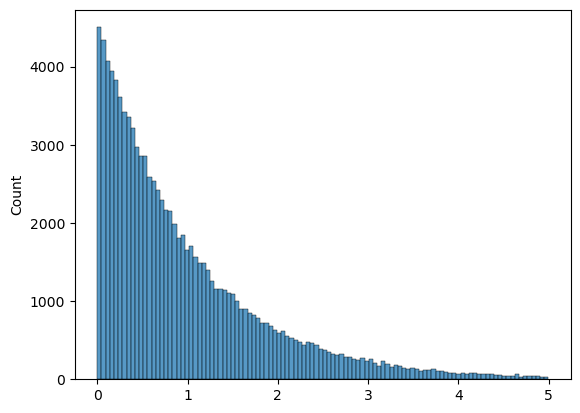

In [61]:
samples = accept_reject(exponential_density, 100000)
print(np.mean(samples))

sns.histplot(samples)

<Axes: ylabel='Count'>

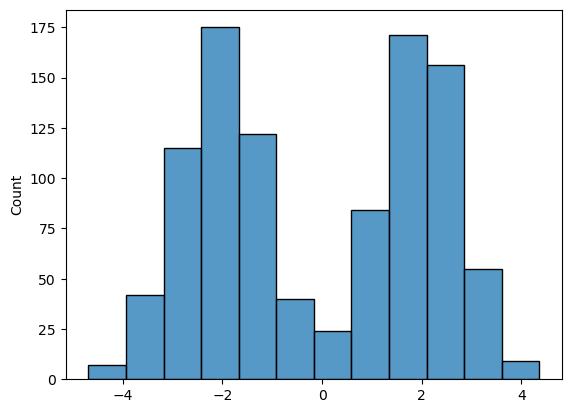